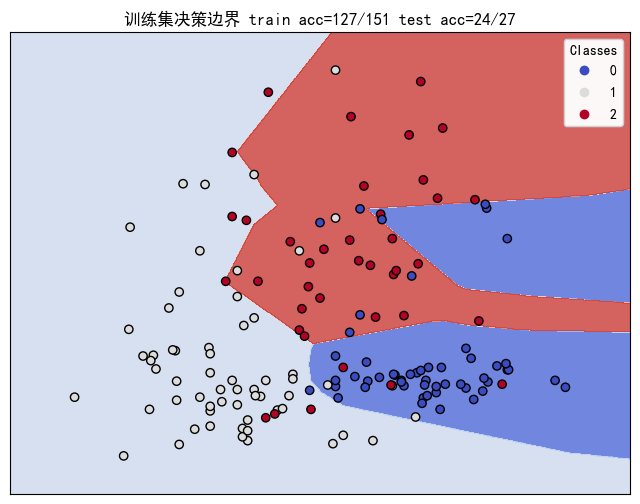

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from ipywidgets import interactive
from IPython.display import display


X, y = load_wine(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=520)
plt.rcParams['font.family'] = 'SimHei'      # 中文正常显示
plt.rcParams['axes.unicode_minus'] = False  # 符号正常显示


# 定义函数来绘制决策边界，cmap 颜色可选 'coolwarm' 'spring' 'summer' 'autumn' 
# 'winter' 'bone' 'copper' 'gray' 'pink' 'hot' 'rainbow' 'viridis'
def plot_decision_boundary(X, y, model, ax, steps=1000, cmap='coolwarm',title='决策边界'):
    """
    绘制决策边界, X 为数据集，y 为标签，model 为训练好的模型，ax 为绘制的坐标轴，steps 为网格的步长，cmap 为颜色
    """
    cmap = plt.get_cmap(cmap)
    
    # 定义坐标轴范围,并创建网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                         np.linspace(y_min, y_max, steps))

    # 计算 Z，即每个网格点的预测值
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制等高线和训练集散点图
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k')
    
    # 图例
    legend1 = ax.legend(*scatter.legend_elements(),
                        title="Classes")
    ax.add_artist(legend1)
        # 设置坐标轴范围和标题

    ax.set_xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
    ax.set_ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

clf = MLPClassifier(hidden_layer_sizes=np.intp(np.ones(5)*10),
                    random_state=1, max_iter=10000).fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(8,6))
plot_decision_boundary(X_train, y_train, clf, ax)

pre_train = clf.predict(X_train)
pre_test = clf.predict(X_test)
plt.title("训练集决策边界 train acc={}/{} test acc={}/{}"
        .format((pre_train==y_train).sum(),y_train.size,
                (pre_test==y_test).sum(),y_test.size))
plt.show()

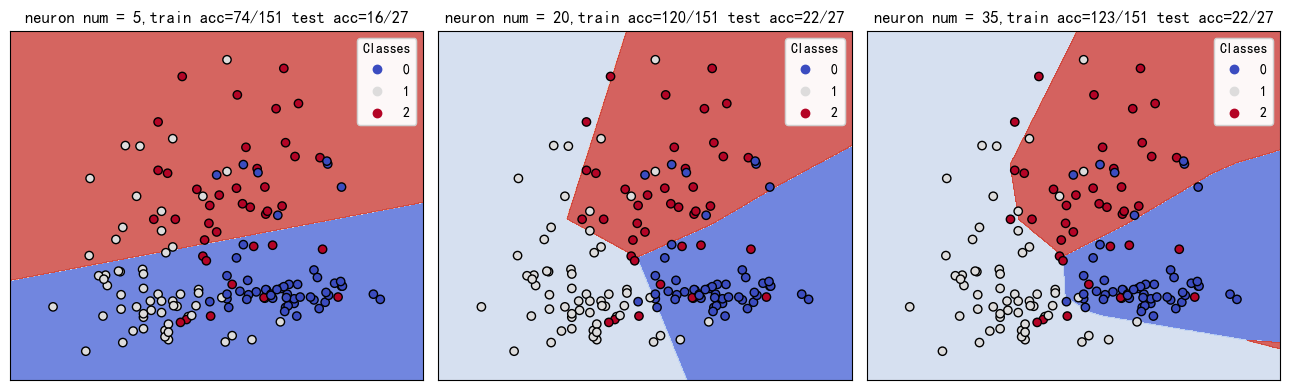

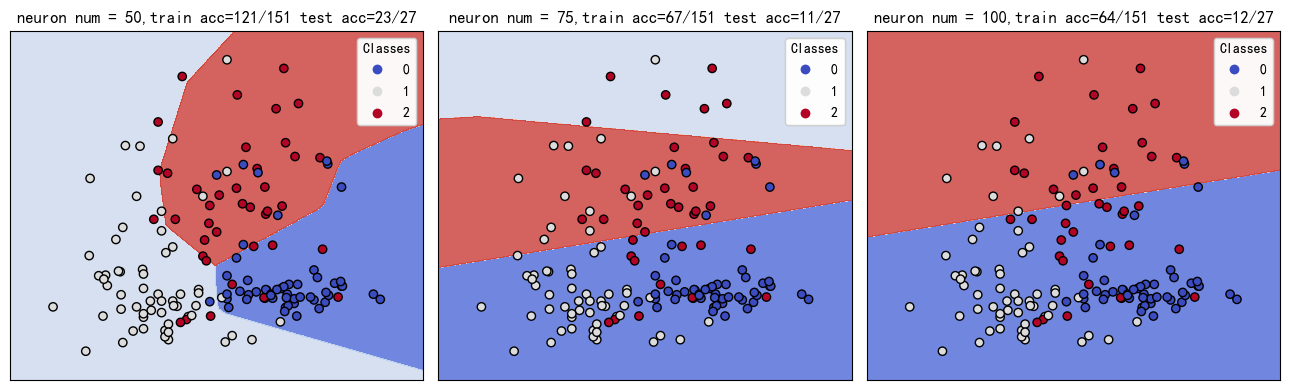

In [5]:

def change_neuron_num(n=10,ax = None):
    clf = MLPClassifier(hidden_layer_sizes=n,random_state=520, max_iter=10000, ).fit(X_train, y_train)
    # fig, ax = plt.subplots(figsize=(6,4))
    plot_decision_boundary(X_train, y_train, clf, ax = ax)
    # plot_decision_boundary(clf,X_train,y_train)
    pre_train = clf.predict(X_train)
    pre_test = clf.predict(X_test)
    plt.title("neuron num = {},train acc={}/{} test acc={}/{}"
            .format(n,(pre_train==y_train).sum(),y_train.size,
                      (pre_test==y_test).sum(),y_test.size),fontdict={'fontsize': 12})        

    plt.tight_layout()  # 调整图形边界
    plt.savefig("n={}.jpg".format(n), bbox_inches='tight')  
    # bbox_inches='tight'参数使保存图形时，只包含紧凑的边界部分，避免保存过多白边
# interact(change_neuron_num, n=[5,20,35,50,75,100,150])

# talking_neuron_num = [5,20,35,50,75,100,150]
# for a_neuron in talking_neuron_num:
#     change_neuron_num(a_neuron)
plt.figure(figsize=[13, 4])
ax1 = plt.subplot(131)
change_neuron_num(5,ax1)
ax2 = plt.subplot(132)
change_neuron_num(20,ax2)
ax3 = plt.subplot(133)
change_neuron_num(35,ax3)
plt.figure(figsize=[13, 4])
ax4 = plt.subplot(131)
change_neuron_num(50,ax4)
ax5 = plt.subplot(132)
change_neuron_num(75,ax5)
ax6 = plt.subplot(133)
change_neuron_num(100,ax6)

d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


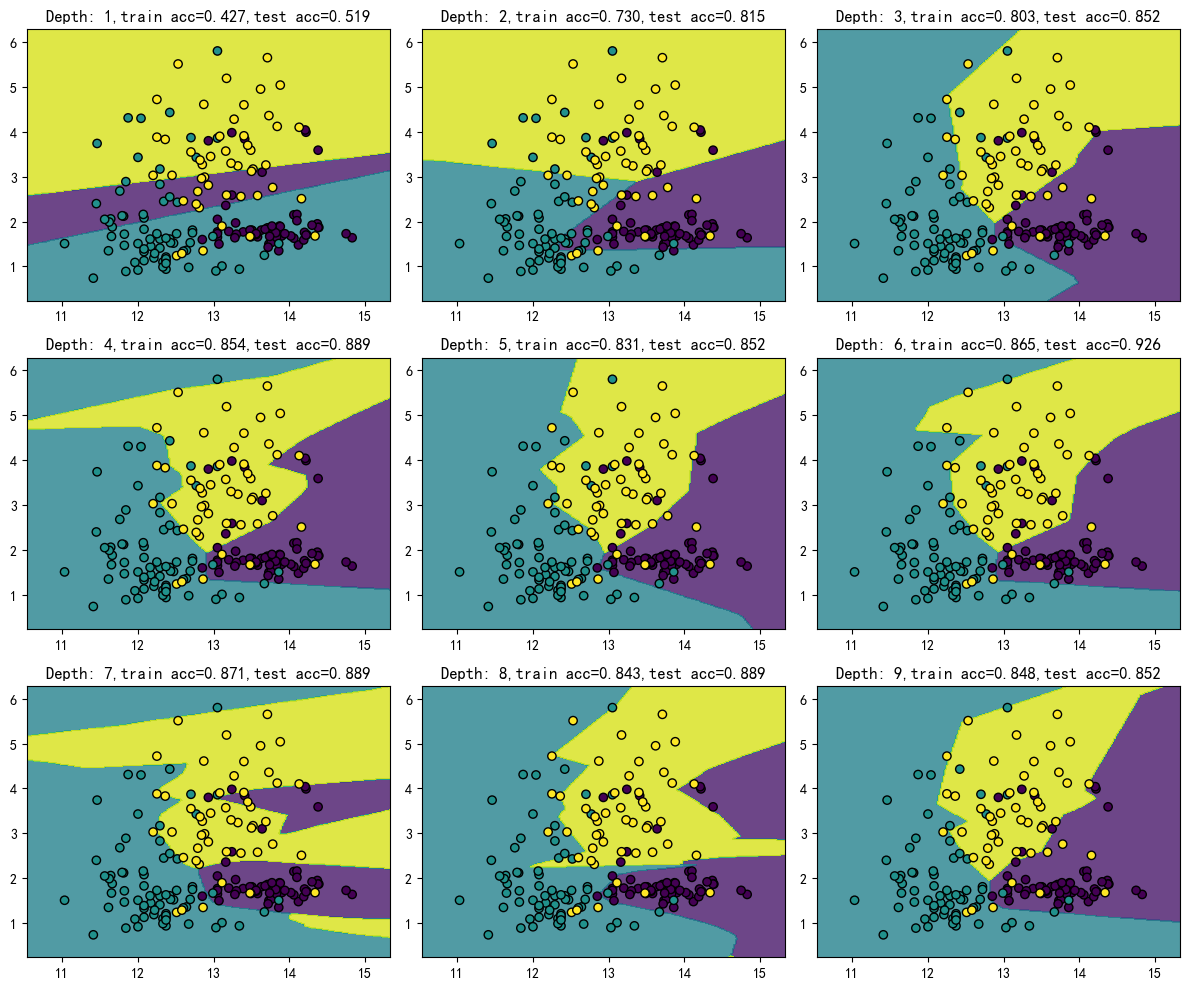

In [6]:
# 修改隐藏层深度
hidden_layer_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # 不同的隐藏层深度
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for depth, ax in zip(hidden_layer_depths, axes.flatten()):
    # 创建MLP分类器
    clf = MLPClassifier(hidden_layer_sizes=(15,) * depth, max_iter=1000, random_state=1111)

    # 拟合模型
    clf.fit(X_train, y_train)

    # 绘制决策边界
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)

    # 绘制样本点
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    # ax.set_title(f"Depth: {depth},train acc={clf.score(X,y)},test acc={clf.score(X_test,y_test)}")
    # 像上面这样不好，对于score应该只显示两位小数
    ax.set_title(f"Depth: {depth},train acc={clf.score(X,y):.3f},test acc={clf.score(X_test,y_test):.3f}")

plt.tight_layout()
plt.show()

d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


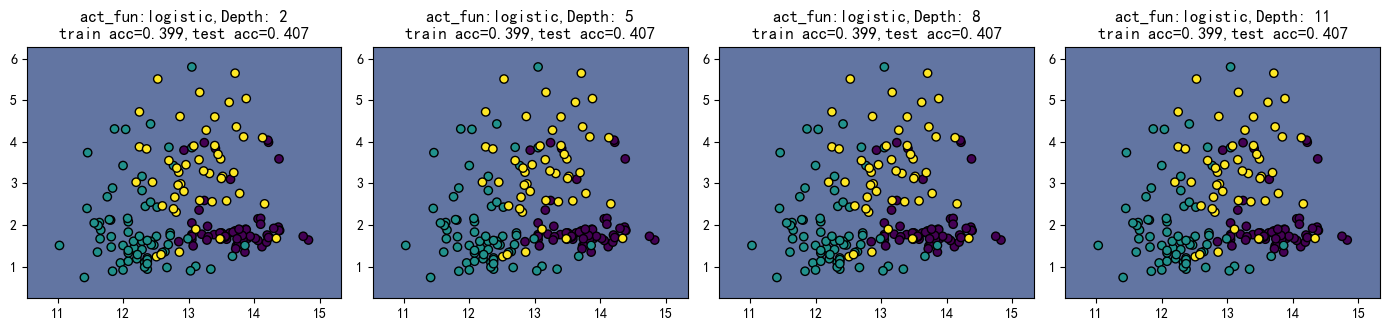

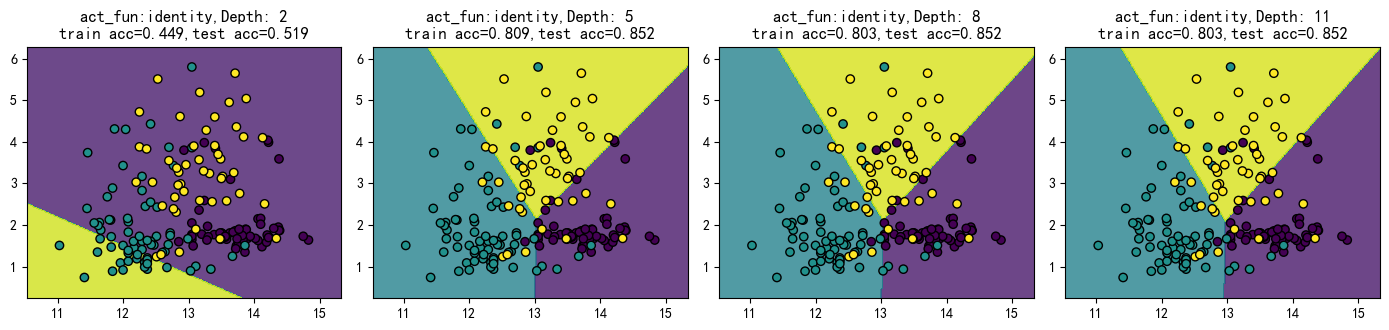

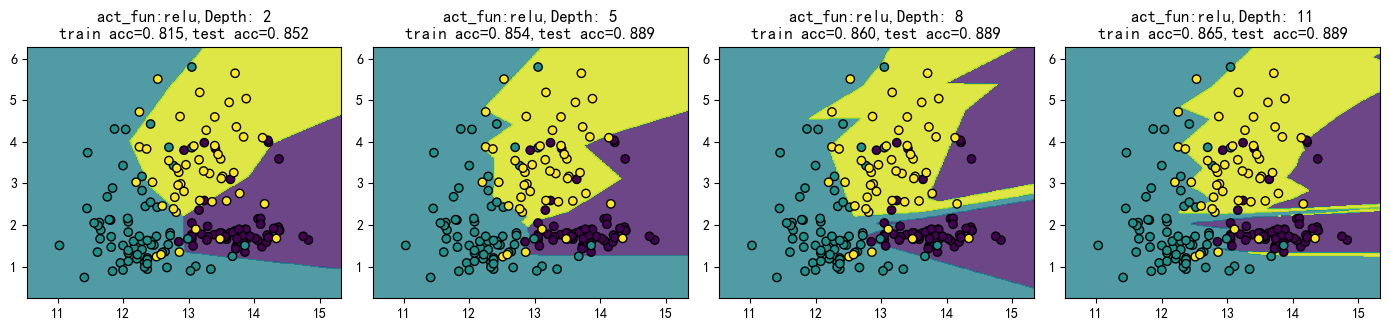

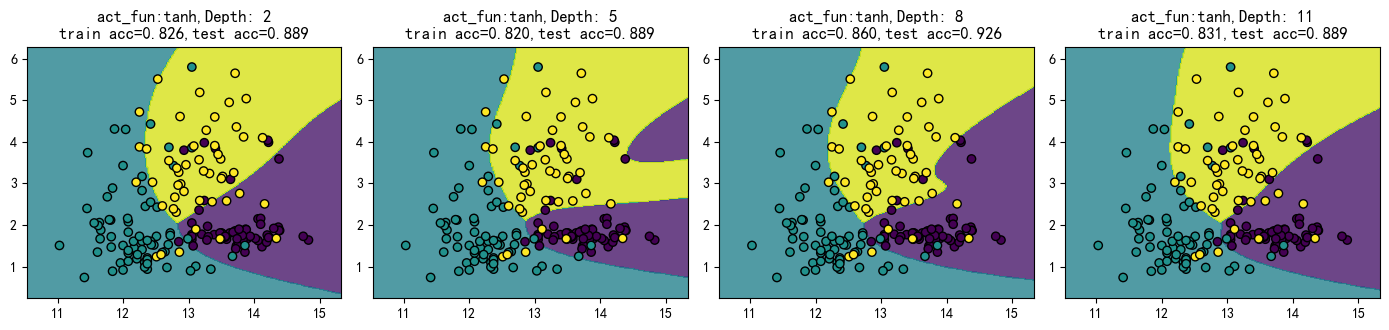

: 

In [7]:
# 修改隐藏层深度
hidden_layer_depths = [2, 5, 8, 11]  # 不同的隐藏层深度
act_fun_list = ['logistic', 'identity', 'relu', 'tanh']

for act_fun in act_fun_list:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 3.4))
    for one_depth, ax in zip(hidden_layer_depths, axes.flatten()):

        # 创建MLP分类器
        clf = MLPClassifier(activation=act_fun, hidden_layer_sizes=(15,) * one_depth, max_iter=1000, random_state=1)

        # 拟合模型
        clf.fit(X_train, y_train)

        # 绘制决策边界
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min, y_max, 0.02))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8)

        # 绘制样本点
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        # ax.set_title(f"Depth: {depth},train acc={clf.score(X,y)},test acc={clf.score(X_test,y_test)}")
        # 像上面这样不好，对于score应该只显示两位小数
        ax.set_title(f"act_fun:{act_fun},Depth: {one_depth}\ntrain acc={clf.score(X,y):.3f},test acc={clf.score(X_test,y_test):.3f}")

    plt.tight_layout()
plt.show()